In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
df.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [8]:
df.shape

(21, 2)

In [9]:
df[df.duplicated()].shape

(0, 2)

In [10]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
data=df.rename({'Delivery Time':'del_time','Sorting Time':'sort_time'},axis=1)

In [12]:
data.head()

,del_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='del_time'>

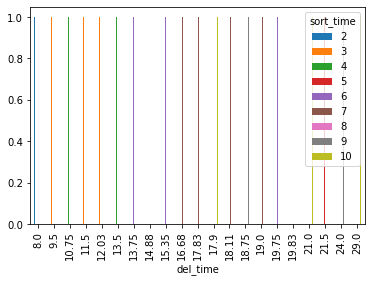

In [14]:
pd.crosstab(data.del_time,data.sort_time).plot(kind="bar")

C:\Users\javed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='del_time', ylabel='Density'>

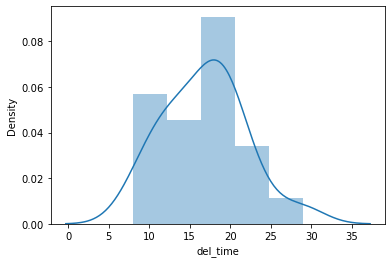

In [15]:
sns.distplot(data['del_time'])

C:\Users\javed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sort_time', ylabel='Density'>

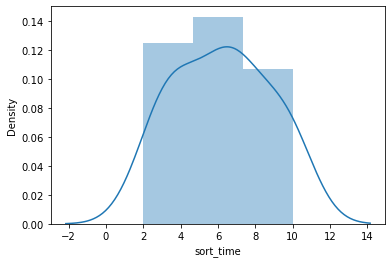

In [16]:
sns.distplot(data['sort_time'])

In [17]:
import statsmodels.formula.api as smf

In [18]:
model=smf.ols("del_time~sort_time",data=data).fit()

<AxesSubplot:xlabel='del_time', ylabel='sort_time'>

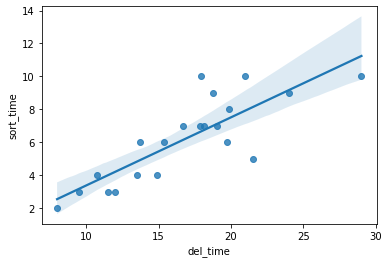

In [19]:
sns.regplot(x='del_time',y='sort_time',data=data)

In [20]:
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [21]:
print(model.tvalues, '/n', model.pvalues)

Intercept    3.823349
sort_time    6.387447
dtype: float64 /n Intercept    0.001147
sort_time    0.000004
dtype: float64


In [22]:
(model.rsquared,  model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [52]:
import numpy
np.sqrt(model)
#np.sqrt(data)

,del_time,sort_time,SortingTime_Sq
0,2.140695,1.778279,3.162278
1,1.916829,1.414214,2.000000
2,2.108103,1.565085,2.449490
3,2.213364,1.732051,3.000000
4,2.320596,1.778279,3.162278
5,1.979371,1.565085,2.449490
6,2.087798,1.626577,2.645751
7,1.755622,1.316074,1.732051
8,2.056900,1.778279,3.162278
9,2.080896,1.732051,3.000000


In [25]:
model2=smf.ols("del_time~np.log(sort_time)",data=data).fit()
model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        16:51:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sort_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
print(model2.conf_int(0.05))

                         0          1
Intercept         -3.97778   6.297147
np.log(sort_time)  6.16977  11.917057


In [27]:
pred1 = model2.predict(data) # Predicted values of dt using the model
pred1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [28]:
model3 = smf.ols('np.log(del_time)~sort_time',data=data).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        16:54:00   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sort_time      0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print(model3.conf_int(0.05))

                  0         1
Intercept  1.905848  2.336896
sort_time  0.073235  0.137869


In [31]:
pred2 = model3.predict(data) # Predicted values of dt using the model
pred2

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

Text(0, 0.5, 'del_time')

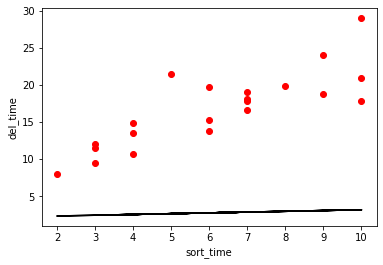

In [32]:
plt.scatter(x=data['sort_time'],y=data['del_time'],color='red');plt.plot(data['sort_time'],pred2,color='black');plt.xlabel('sort_time');plt.ylabel('del_time')


In [33]:
data["SortingTime_Sq"] = data.sort_time*data.sort_time
model_quad = smf.ols("np.log(del_time)~sort_time+SortingTime_Sq",data=data).fit()

In [34]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(del_time)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.20e-06
Time:                        16:57:52   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
sort_time          0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(model_quad.conf_int(0.05))


                       0         1
Intercept       1.219786  2.179623
sort_time       0.097381  0.434462
SortingTime_Sq -0.026119  0.000438


In [37]:
pred3 = model_quad.predict(data) # Predicted values of dt using the model
pred3

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

Text(0, 0.5, 'del_time')

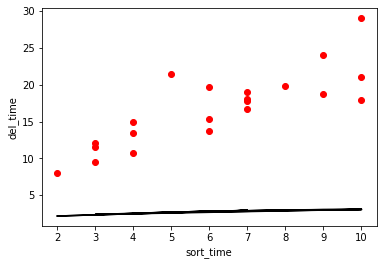

In [40]:
plt.scatter(x=data['sort_time'],y=data['del_time'],color='red');plt.plot(data['sort_time'],pred3,color='black');plt.xlabel('sort_time');plt.ylabel('del_time')


(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

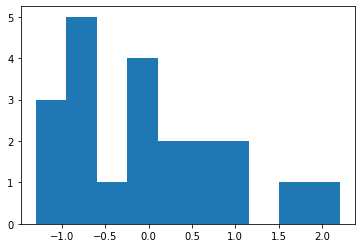

In [41]:
plt.hist(model_quad.resid_pearson)
